# Exercise Sheet 1
first, we import numpy to efficiently use array operations, and as it is the standard for most scientific applications in Python.

In [18]:
import numpy as np

## Assignment 1
We will use an adjacency matrix to represent a graph. With this, we want to implement
a) A count of the edges in the graph
b) The density of the Network
c) in and out degree of each node (put out as an array)
    With a parameter called mode that switches between degree, indegree and outdegree
d) if the adjacancy-matrix is symmetrical, aka if the graph is undirected or directed.

The first step is to find a somewhat agreed on format for the adjacency-matrix. For this, we will import the popular library networkx and view their np representation of graphs

[[0. 1. 0. 1.]
 [0. 0. 0. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]]


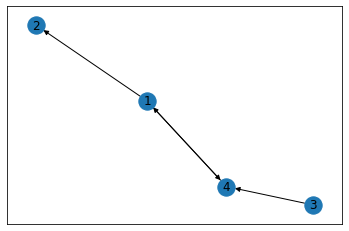

In [19]:
import networkx as nx

digraph = nx.DiGraph()
digraph.add_edge(1, 2)
digraph.add_edge(3, 4)
digraph.add_edge(4, 1)
digraph.add_edge(1, 4)

print(nx.to_numpy_matrix(digraph))

nx.draw_networkx(digraph)

Ok, this looks fairly straightforward. We can see that the first index is 
### Counting edges
Now for our first task: Counting the edges. With this non-boolean approach, we can easily do this with a complete sum.
I have decided to add another helper function to verify that a matrix can be validly interpreted as an adjacency matrix.

In [20]:
def is_adjacency_matrix(nparray):
    all_in_one_or_zero = True
    for i in np.nditer(nparray):
        if i not in [0, 1]:
            all_in_one_or_zero = False
    quadratic_shape = len(nparray.shape) == 2 and nparray.shape[0] == nparray.shape[1]

    return all_in_one_or_zero and quadratic_shape

def reject_if_not_ajmatrix(adjacency_matrix):
        if not is_adjacency_matrix(adjacency_matrix):
            raise ValueError("array can't be interpreted as an adjacency matrix.")
def count_edges(adjacency_matrix):
    reject_if_not_ajmatrix
    return np.sum(adjacency_matrix)

adjacency_matrix = nx.to_numpy_matrix(digraph)
print(count_edges(adjacency_matrix))

4.0


### Density
The density is the ration of possible edge amount in a graph to actual edge amount in a graph. We assume that we investigate a directed graph. We also add a function for counting vertices.

In [21]:
def vertice_count(adjacency_matrix):
    reject_if_not_ajmatrix(adjacency_matrix)
    return adjacency_matrix.shape[0]

def density(adjacency_matrix):
    vertice_amount = vertice_count(adjacency_matrix)
    return count_edges(adjacency_matrix) / (vertice_amount * (vertice_amount -1))

density(adjacency_matrix)

0.3333333333333333

### Degrees

full degrees: [3. 1. 1. 3.]
in degrees: [1. 1. 0. 2.]
out degrees: [2. 0. 1. 1.]


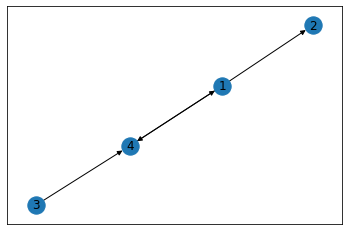

In [32]:
def degrees(matrix, mode="degree"):
    validmodes = ["indegree", "outdegree", "degree"]
    if mode not in validmodes:
        raise ValueError(f"Invalid mode. Try one of {validmodes}")
    reject_if_not_ajmatrix(matrix)
    accumulator = np.zeros((matrix.shape[0]))
    for (i, j), value in np.ndenumerate(matrix):
        if value > 0:
            if mode == "indegree":
                accumulator[j] += 1
            if mode == "outdegree":
                accumulator[i] += 1
            if mode == "degree":
                accumulator[i] += 1
                accumulator[j] += 1
    return accumulator

print(f'full degrees: {degrees(adjacency_matrix)}')
print(f'in degrees: {degrees(adjacency_matrix, mode = "indegree")}')
print(f'out degrees: {degrees(adjacency_matrix, mode = "outdegree")}')
nx.draw_networkx(digraph, pos=nx.kamada_kawai_layout(digraph))

This looks like it checks out.
### Symmetry
